In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "log_of_counts/forecasted_counts/block_0103/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [5]:
averaged_forecasts_csvs.sort()
averaged_forecasts_csvs

['averaged_forecasts_sub_0.csv',
 'averaged_forecasts_sub_1.csv',
 'averaged_forecasts_sub_10.csv',
 'averaged_forecasts_sub_11.csv',
 'averaged_forecasts_sub_2.csv',
 'averaged_forecasts_sub_3.csv',
 'averaged_forecasts_sub_4.csv',
 'averaged_forecasts_sub_5.csv',
 'averaged_forecasts_sub_6.csv',
 'averaged_forecasts_sub_7.csv',
 'averaged_forecasts_sub_8.csv',
 'averaged_forecasts_sub_9.csv']

In [6]:
# add the 10, 11 at the end
csv_files_10_11 = ['averaged_forecasts_sub_10.csv', 'averaged_forecasts_sub_11.csv']

In [7]:
other_files = [i for i in averaged_forecasts_csvs if i not in csv_files_10_11]

In [8]:
ordered_csv_files = other_files + csv_files_10_11

In [9]:
ordered_csv_files

['averaged_forecasts_sub_0.csv',
 'averaged_forecasts_sub_1.csv',
 'averaged_forecasts_sub_2.csv',
 'averaged_forecasts_sub_3.csv',
 'averaged_forecasts_sub_4.csv',
 'averaged_forecasts_sub_5.csv',
 'averaged_forecasts_sub_6.csv',
 'averaged_forecasts_sub_7.csv',
 'averaged_forecasts_sub_8.csv',
 'averaged_forecasts_sub_9.csv',
 'averaged_forecasts_sub_10.csv',
 'averaged_forecasts_sub_11.csv']

In [10]:
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

In [11]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [12]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,1.386294,1.541261,1.611060,1.674360,1.974523,2.029238,1.098615,0.794054,1.468809,1.895101,...,0.693474,0.510615,0.504370,0.979441,1.116603,1.117897,1.609424,1.741466,0.000000,-0.051043
1,1.609941,1.497684,1.566259,1.645498,2.185501,2.157015,1.072574,0.756410,1.795093,1.689149,...,0.158616,0.202568,1.091066,0.882499,1.296354,1.280092,1.671756,1.732130,0.000000,-0.919408
2,1.609469,1.528779,1.610357,1.754615,2.037852,2.021067,0.693146,0.881894,1.609407,1.836416,...,0.000005,0.629209,1.386294,1.113030,1.386294,1.346618,1.945908,1.748624,0.000013,0.469310
3,1.386294,1.377315,1.609438,1.480263,1.609444,2.461640,0.405465,0.712273,1.386294,1.334526,...,0.405465,-0.555601,0.693147,0.644745,1.052637,0.627986,1.625379,1.608207,0.000000,-1.675839
4,1.386294,1.464426,1.613938,1.528388,1.728711,2.085491,0.685896,0.758700,1.098612,1.120669,...,0.022302,-0.565679,1.098612,0.469817,0.693163,0.765362,1.790403,1.602998,0.008069,-0.488779


In [13]:
combined_df.shape

(7, 24)

In [14]:
# get the true values
True_values_df = combined_df[['True_value']]

In [15]:
True_values_df

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,1.386294,1.611060,1.974523,1.098615,1.468809,1.598489,2.378505,0.693474,0.504370,1.116603,1.609424,0.000000
1,1.609941,1.566259,2.185501,1.072574,1.795093,1.437771,1.615950,0.158616,1.091066,1.296354,1.671756,0.000000
2,1.609469,1.610357,2.037852,0.693146,1.609407,1.608518,1.844651,0.000005,1.386294,1.386294,1.945908,0.000013
3,1.386294,1.609438,1.609444,0.405465,1.386294,1.399817,1.945906,0.405465,0.693147,1.052637,1.625379,0.000000
4,1.386294,1.613938,1.728711,0.685896,1.098612,1.625379,1.833479,0.022302,1.098612,0.693163,1.790403,0.008069
5,1.609438,1.953659,1.800381,1.081147,1.098612,1.632744,1.911756,1.117335,0.693147,0.699477,1.945249,0.693147
6,0.693147,1.704748,1.640148,0.002523,1.386126,1.098612,1.847514,1.097832,0.693484,0.693147,1.386302,0.000000


In [16]:
exp_true = np.exp(True_values_df)-1

In [17]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [18]:
sum_true_values

0    40.000662
1    39.000001
2    41.000000
3    31.000000
4    32.000000
5    40.002086
6    27.000176
dtype: float64

In [19]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [20]:
Forecasted_values_df

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,1.541261,1.674360,2.029238,0.794054,1.895101,1.484582,1.871356,0.510615,0.979441,1.117897,1.741466,-0.051043
1,1.497684,1.645498,2.157015,0.756410,1.689149,1.493823,1.799283,0.202568,0.882499,1.280092,1.732130,-0.919408
2,1.528779,1.754615,2.021067,0.881894,1.836416,1.545791,2.094138,0.629209,1.113030,1.346618,1.748624,0.469310
3,1.377315,1.480263,2.461640,0.712273,1.334526,1.501658,1.792906,-0.555601,0.644745,0.627986,1.608207,-1.675839
4,1.464426,1.528388,2.085491,0.758700,1.120669,1.516777,1.750450,-0.565679,0.469817,0.765362,1.602998,-0.488779
5,1.490099,1.542499,2.234002,0.753876,1.388816,1.511065,1.725781,0.533435,0.880940,1.016455,1.689029,-0.603235
6,1.458566,1.392803,2.363627,0.764778,1.460895,1.516922,1.735019,0.526583,0.764317,0.345154,1.610968,-1.608834


In [21]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [22]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,3.670475,4.335380,6.608290,1.212348,5.653219,3.413121,5.497101,0.666316,1.662967,2.058414,4.705701,-0.049762
1,3.471321,4.183590,7.645295,1.130615,4.414869,3.454089,5.045312,0.224543,1.416932,2.596972,4.652683,-0.601245
2,3.612540,4.781223,6.546373,1.415470,5.274011,3.691684,7.118441,0.876125,2.043566,2.844401,4.746690,0.598891
3,2.964244,3.394101,10.724018,1.038620,2.798194,3.489124,5.006884,-0.426272,0.905501,0.873833,3.993847,-0.812849
4,3.325060,3.610738,7.048544,1.135498,2.066904,3.557515,4.757192,-0.432026,0.599701,1.149772,3.967906,-0.386625
5,3.437533,3.676263,8.337159,1.125222,3.010099,3.531554,4.616906,0.704779,1.413166,1.763381,4.414221,-0.452961
6,3.299791,3.026121,9.629435,1.148517,3.309815,3.558176,4.669034,0.693136,1.147527,0.412207,4.007655,-0.799879


In [23]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [24]:
sum_forecasted_values

0    39.433571
1    37.634977
2    43.549416
3    33.949245
4    30.400178
5    35.577323
6    34.101534
dtype: float64

In [25]:
# concatenate the sum dataframes
block_0103_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [26]:
block_0103_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [27]:
block_0103_true_and_forecasted_values_df

,True_count,Forecasted_count
0,40.000662,39.433571
1,39.000001,37.634977
2,41.000000,43.549416
3,31.000000,33.949245
4,32.000000,30.400178
5,40.002086,35.577323
6,27.000176,34.101534


In [28]:
block_0103_true_and_forecasted_values_df.to_csv("log_of_counts/final_forecasted_counts/block_0103_finals_forecasts.csv", index = False)

In [29]:
# # well we need to verify that the above true values are indeed correct
# from preprocess script we have the following counts
# [43, 49, 53, 59, 45, 42, 34, 39, 37, 43, 41, 39, 43, 40, 39, 41, 31, 32, 40, 27] # the last seven numbers match with what we have.

In [30]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

3.584683691206566

In [31]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

2.9366740888036946

In [32]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.7332138615792699, pvalue=0.06078447561179049)

In [33]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

0.5201379500522163

In [34]:
# May be define a function for this, so that it will be easier to get the forecasted dataframes for all blocks

In [35]:
# # we need first the path to dfs per block
# def get_final_forecasted_dfs(path_to_dfs_in_block, block_name, true_values_col_name, forecasted_values_col_name, forecast_path):
#     # get the csv files that have the averaged 
#     average_frcts_csv_files = [file for file in os.listdir(path_to_dfs_in_block) if file[:8] == 'averaged']
#     # sort these files
#     average_frcts_csv_files.sort()
#     # get the later images to the end of the list
#     csv_files_10_11 = ['averaged_forecasts_sub_10.csv', 'averaged_forecasts_sub_11.csv']
#     # remove these from the total list
#     other_files = [i for i in average_frcts_csv_files if i not in csv_files_10_11]
#     # add the csv files in order
#     ordered_csv_files = other_files + csv_files_10_11
#     # print the ordered list of csv files
#     print(ordered_csv_files)
#     # read and append the list of the dfs
#     all_dfs = [pd.read_csv(path_to_dfs_in_block + '/' + df) for df in ordered_csv_files]
#     # combine all these dfs together
#     combined_df = pd.concat(all_dfs, axis = 1)
#     print(combined_df.shape)
#     # extract the true value columns only across the sub-images
#     True_counts_df = combined_df[[true_values_col_name]]
#     # sum the true values dfs
#     total_true_values = True_counts_df.sum(axis = 1)
#     # print these true values for later comparisons
#     print(total_true_values)
#     # extract the true value columns across sub images
#     Forecasted_counts_df = combined_df[[forecasted_values_col_name]]
#     # sum the forecasted values
#     total_forecasted_values = Forecasted_counts_df.sum(axis = 1)
#     # concatenate the sum dataframes
#     true_and_forecasted_values_df = pd.concat((total_true_values, total_forecasted_values), axis = 1)
#     # add column titles to the df
#     true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]
#     # save this file
#     file_name = forecast_path + '/' + block_name + '.csv'
#     true_and_forecasted_values_df.to_csv(file_name, index = False)
#     # blockwise mean squared error
#     rmse = np.sqrt(mean_squared_error(total_true_values, total_forecasted_values))
#     # blockwise mae
#     mae = mean_absolute_error(total_true_values, total_forecasted_values)

#     return(true_and_forecasted_values_df, rmse, mae,ordered_csv_files)

In [36]:
# # see if the function works
# df, rmse_0103, mae_0103, ordered_files_0103 = get_final_forecasted_dfs(path_to_dfs, 'block_0103', 'True_value', 'Forecasted_value', 'final_forecasted_counts')

In [37]:
# df

In [38]:
# rmse_0103

In [39]:
# mae_0103

In [40]:
# ordered_files_0103

In [41]:
# Getting the coverages and the widths for the forecasted values - This can be done with the saved all forecasts npy files
# location for the forecast files (all forecasts)
location_all_forecasts = 'log_of_counts/forecasted_counts/block_0103'

# contents at this location
all_contents = os.listdir(location_all_forecasts)
all_contents.sort()

In [42]:
# we need the npy files for all forecasts
all_forecast_files = [file for file in all_contents if file[:3] == 'all']

In [43]:
# arange the files in order
later_npy_files = ['all_forecasts_sub_10.npy', 'all_forecasts_sub_11.npy']
first_files = [file for file in all_forecast_files if file not in later_npy_files]

In [44]:
final_all_forecast_files = first_files + later_npy_files

In [45]:
loaded_npy_files = []
for file in final_all_forecast_files:
    joined_path = os.path.join(location_all_forecasts, file)
    load_file = np.load(joined_path)
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

In [46]:
len(loaded_npy_files)

12

In [47]:
loaded_npy_files[0].shape

(1000, 7)

In [48]:
# np.exp(loaded_npy_files[0]) - 1

In [49]:
loaded_npy_files[1]

array([[5.2525463 , 4.962702  , 5.2312984 , ..., 3.941568  , 4.0420723 ,
        3.6469698 ],
       [4.4876623 , 3.7306013 , 4.686037  , ..., 1.949924  , 2.366203  ,
        0.80514264],
       [4.0533156 , 3.7820964 , 4.380148  , ..., 2.2299507 , 2.0121574 ,
        0.46847284],
       ...,
       [4.2541165 , 3.9395986 , 4.478001  , ..., 4.087464  , 4.5815268 ,
        4.281813  ],
       [3.9941735 , 4.54015   , 4.7698116 , ..., 4.902109  , 4.869144  ,
        4.9503555 ],
       [4.6720705 , 4.457528  , 4.364118  , ..., 4.7931995 , 4.489139  ,
        4.2022624 ]], dtype=float32)

In [50]:
# try_0 = loaded_npy_files[0] + loaded_npy_files[1]

In [51]:
output = sum(loaded_npy_files)

In [52]:
output.shape

(1000, 7)

In [53]:
output

array([[43.245617, 37.269337, 43.998306, ..., 42.5573  , 53.85742 ,
        52.219936],
       [41.03256 , 39.135845, 44.794174, ..., 31.626966, 34.77504 ,
        36.97279 ],
       [40.83603 , 37.27835 , 43.63948 , ..., 44.456806, 36.493073,
        38.334435],
       ...,
       [42.853363, 37.8577  , 44.703575, ..., 33.43779 , 38.117958,
        38.849667],
       [38.77658 , 33.235466, 45.6197  , ..., 22.974583, 28.053041,
        27.165083],
       [43.3782  , 43.557457, 44.90035 , ..., 53.785065, 46.310074,
        58.98358 ]], dtype=float32)

In [54]:
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [55]:
li_train

array([[35.8984293 ],
       [33.75921135],
       [39.66983919],
       [25.16982813],
       [22.7839407 ],
       [27.65974965],
       [25.58881507]])

In [56]:
ui_train

array([[43.90717783],
       [43.37001486],
       [48.47618351],
       [54.50156126],
       [49.12762108],
       [55.45833092],
       [55.51610546]])

In [57]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [58]:
avg_width_train

19.975311647142682

In [59]:
y_traina = block_0103_true_and_forecasted_values_df[["True_count"]].values

In [60]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [61]:
coverage_train

1.0

In [62]:
np.mean(output, axis = 0)

array([39.779198, 38.11692 , 43.87467 , 37.059296, 32.918346, 38.409565,
       37.39878 ], dtype=float32)

In [63]:
sum_forecasted_values

0    39.433571
1    37.634977
2    43.549416
3    33.949245
4    30.400178
5    35.577323
6    34.101534
dtype: float64

In [64]:
# final_array = output.reshape(4000,7)

In [65]:
# final_array_means = np.mean(final_array, axis = 1)

In [66]:
# final_array.shape

In [67]:
# exp_vals = np.exp(final_array)-1

In [68]:
# print(np.min(exp_vals[:,0]), np.max(exp_vals[:,0]))
# print(np.min(final_array[:,1]), np.max(final_array[:,1]))
# print(np.min(final_array[:,2]), np.max(final_array[:,2]))
# print(np.min(final_array[:,3]), np.max(final_array[:,3]))
# print(np.min(final_array[:,4]), np.max(final_array[:,4]))
# print(np.min(final_array[:,5]), np.max(final_array[:,5]))
# print(np.min(final_array[:,6]), np.max(final_array[:,6]))

In [69]:
# import seaborn as sns

In [70]:
# np.exp(10)

In [71]:
# sns.kdeplot(data=final_array[:,0])
# sns.kdeplot(data=final_array[:,1])
# sns.kdeplot(data=final_array[:,2])
# sns.kdeplot(data=final_array[:,3])
# sns.kdeplot(data=final_array[:,4])
# sns.kdeplot(data=final_array[:,5])
# sns.kdeplot(data=final_array[:,6])

In [72]:
# np.mean(final_array, axis = 0)

In [73]:
# li_train = np.percentile(final_array, axis = 0, q = (5, 95))[0,:].reshape(-1,1)    
# ui_train = np.percentile(final_array, axis = 0, q = (5, 95))[1,:].reshape(-1,1)

In [74]:
# li_train.shape

In [75]:
# li_train

In [76]:
# ui_train.shape

In [77]:
# ui_train

In [78]:
# width_train = ui_train - li_train
# avg_width_train = width_train.mean(0)[0]

In [79]:
# avg_width_train

In [80]:
# y_traina = block_0103_true_and_forecasted_values_df[["True_count"]].values

In [81]:
# y_traina

In [82]:
# ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
# coverage_train= ind_train.mean(0)[0]

In [83]:
# coverage_train

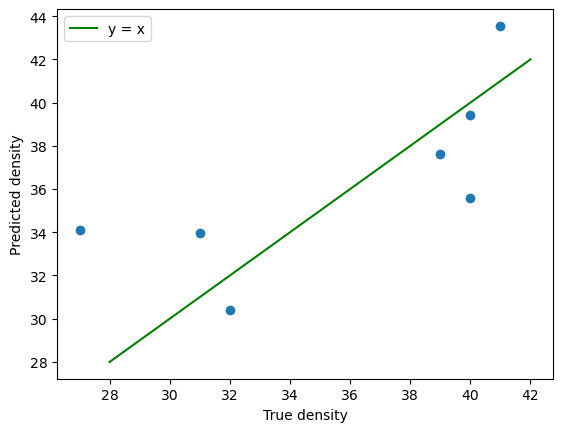

In [84]:
plt.scatter(block_0103_true_and_forecasted_values_df['True_count'], block_0103_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([28, 42], [28, 42], color='green', label='y = x')
plt.legend()
plt.show()

Verify the true counts we have for the test data are indeed correct

In [85]:
# # Verify the true counts - from np arrays - location Block_0103/sub_images_and_counts

# sub_count_loc = 'all_preprocessed_data/Block_0103/sub_images_and_counts'

In [86]:
# sub_density_maps = [i for i in os.listdir(sub_count_loc) if i.split(".")[0][-7:] == 'density']
# sub_density_maps.sort()

In [87]:
# # get the test dates
# test_time_periods = ['2020_08_26', '2020_08_27', '2020_08_28' ,'2020_08_31', '2020_09_02', '2020_09_07', '2020_09_16']

In [88]:
# test_time_periods = ['Block0103_' + i for i in test_time_periods]

In [89]:
# # print the test dates
# test_time_periods

In [90]:
# # get the density maps for these days only for the computation of the total true counts of the test images
# test_density_maps = [i for i in sub_density_maps if i[:20] in test_time_periods]
# test_density_maps.sort()

In [91]:
# %%time
# # get the true counts
# true_counts_in_order = []
# step = 0
# # we have only seven time points
# for u in range(7):
#     catch_counts = []
#     # for each time steps we have 12 images, and since the sub windows are not overlapping we can add the values straightaway eben without sorting
#     for j in range(step, step + 12):
#         total_count = np.sum(np.load(os.path.join(sub_count_loc, test_density_maps[j])))
#         catch_counts.append(total_count)
#     true_counts_in_order.append(np.sum(catch_counts))
#     step = step + 12

In [92]:
# true_counts_in_order

In [93]:
# df[['True_count']].values.flatten()

In [94]:
# see if the two values we get match 

In [95]:
# np.mean(np.round(true_counts_in_order, 0) == np.round(df[['True_count']].values.flatten(), 0))